In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import os
import msc_project.utils.fit_piecewise as pwf
import msc_project.utils.data_utils as du
plt.style.use('ggplot')

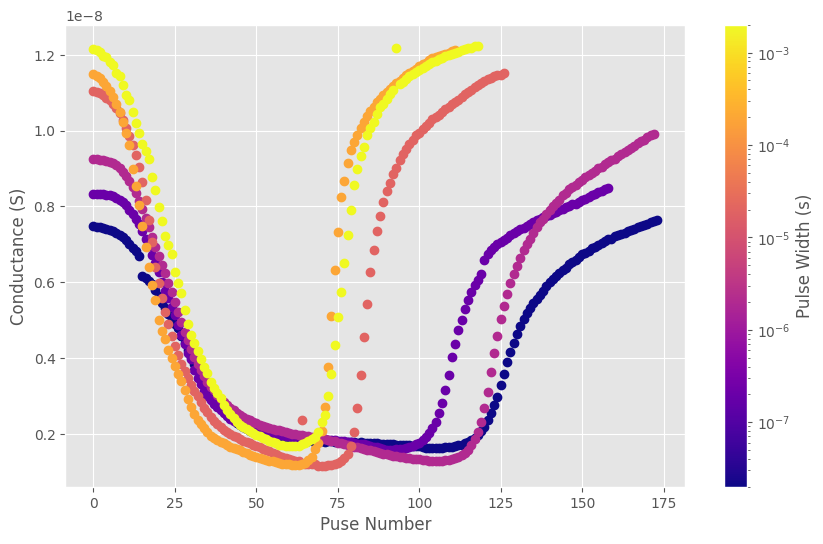

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))

DATA_DIR = '/scratch/msc24h18/msc_project/data/LBE247_analyzed_2nd_run_only'

summary_files = du.get_summary_files(DATA_DIR)
summaries = [du.read_summary_file(filename) for filename in summary_files]
summaries = [s for s in summaries if s[0]['device_id'] == 'ID170ZR5000']

pulseWidths = [float(s[0]['pulseWidth']) for s in summaries]
# Normalize pulseWidths for colormap
norm = clr.LogNorm(min(pulseWidths), max(pulseWidths))
cmap = plt.get_cmap('plasma')

for s, pulseWidth in zip(summaries, pulseWidths):
    data = s[1]
    conductance_l = np.array(1 / data['R_high (ohm)'])
    conductance_h = np.array(1 / data['R_low (ohm)'])
    conductance = (conductance_l + conductance_h) / 2

    color = cmap(norm(pulseWidth))
    ax.plot(conductance, 'o', label=f'Pulse Width: {pulseWidth}', color=color)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Pulse Width (s)')

ax.set(xlabel='Puse Number', ylabel='Conductance (S)')

plt.show()

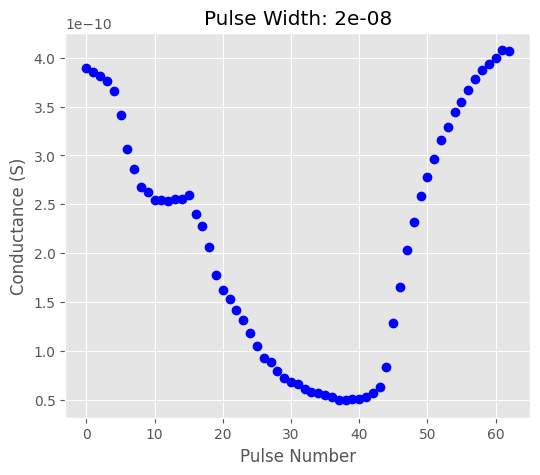

In [16]:
filename = '/scratch/msc24h18/msc_project/data/LBE247_analyzed_2nd_run_only/LBE247_ID301XR1000Oct/pulsedAmplitudeSweep_DCIV_20240919160119/pulsedAmplitudeSweep_DCIV[LBE247_ID301XR1000Oct(1)]20240919160542/pulsedAmplitudeSweep_DCIV[LBE247_ID301XR1000Oct(1)]20240919160542_Summary.dat'

summary, data = du.read_summary_file(filename)
conductance_l = np.array(1 / data['R_high (ohm)'])
conductance_h = np.array(1 / data['R_low (ohm)'])
conductance = (conductance_l + conductance_h) / 2

fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(conductance, 'o', color='blue')
ax.set(xlabel='Pulse Number', ylabel='Conductance (S)', title=f'Pulse Width: {summary["pulseWidth"]}')
plt.show()